S1 Position: 30.66550925925926
S2 Position: 26.104
S1 Position Uncertainty: 0.15198979901654602
S2 Position Uncertainty: 0.14181824988343356
Delta S (S1 Position - S2 Position): 4.56150925925926
Delta S Uncertainty 0.20787812536457523
Period: 495.5769230769231
Period Uncertainty: 2.376022406481845
Observed G Value: (6.07+/-0.29)e-11
Corrected G Value: (6.44+/-0.31)e-11
Percent Error: 0.03+/-0.05


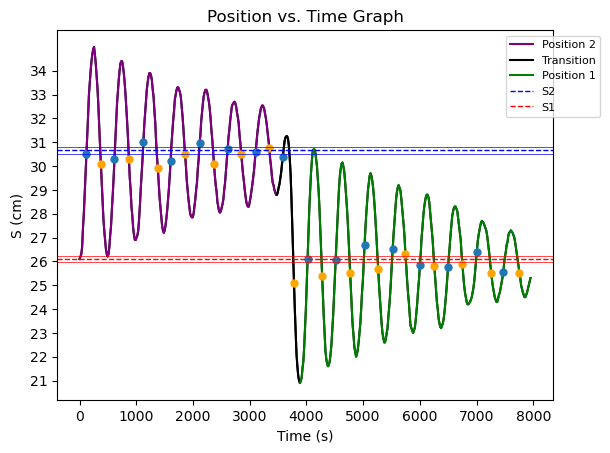

In [1]:
from uncertainties import ufloat
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
from scipy.signal import find_peaks, savgol_filter


#PLOTTING PENDULUM OSCILLATING PATTERNS#

#Import Files
frames = pd.read_csv("/Users/nixoncarino/Desktop/Python/Project/School/Big G Constant/Velocity Peaks Data.csv")
time = np.array(frames['time'].tolist())
position = np.array(frames['position'].tolist())
velocity = np.array(frames['velocity'].tolist())


#Plot position vs. time graph
plt.yticks(np.arange(int(min(position)), int(max(position)), 1))
plt.title("Position vs. Time Graph")
plt.ylabel("S (cm)")
plt.xlabel("Time (s)")
plt.plot(time, position, color = "black")

#Get the position peaks
max_peak, max_height = find_peaks(position, height = 0)
min_peak, min_height = find_peaks(-position, height = -35)

#Plot position vs. time graph at position 2
time_pos_2 = np.array(time[:(min_peak[6]+1)])
position_pos_2 = np.array(position[:(min_peak[6]+1)])
plt.plot(time_pos_2, position_pos_2, color = "purple", label = "Position 2")

#Plot position vs. time graph at transition
time_pos_trans = np.array(time[(min_peak[6]+1):min_peak[7]+2])
position_pos_trans = np.array(position[(min_peak[6]+1):min_peak[7]+2])
plt.plot(time_pos_trans, position_pos_trans, color = "black", label = "Transition")

#Plot position vs. time graph at position 1
time_pos_1 = np.array(time[min_peak[7]:])
position_pos_1 = np.array(position[min_peak[7]:])
plt.plot(time_pos_1, position_pos_1, color = "green", label = "Position 1")

#Get the velocity peaks
velocity_smooth = signal.savgol_filter(velocity, 17 ,2) 
max_vpeak, _ = find_peaks(velocity_smooth, height = 0)
min_vpeak, _ = find_peaks(-velocity_smooth, height = 0)

#Plot Peak Velocities on Position vs. Time Graph
plt.plot(time[max_vpeak], position[max_vpeak], '.', markersize = 10)
plt.plot(time[min_vpeak], position[min_vpeak], '.', color = "orange", markersize = 10)

#Label S1, S1 Uncertainy and S2, S2 Uncertainty
position_range_S1 = position[max_vpeak[0]:(min_vpeak[6]+1)]
S1_mean = np.average(position_range_S1)
dS1 = np.std(position_range_S1) / (len(position_range_S1))**(1/2)
plt.axhline(y=S1_mean, color = "blue", linestyle = 'dashed', linewidth=1, label = "S2")
plt.errorbar(x=0, y=S1_mean, yerr=dS1, ecolor = "blue", elinewidth=0, capsize=400, capthick=0.5)

position_range_S2 = position[max_vpeak[8]:(min_vpeak[15]+1)]
S2_mean = np.average(position_range_S2)
dS2 = np.std(position_range_S2) / (len(position_range_S2))**(1/2)
plt.axhline(y=S2_mean, color = "red", linestyle = 'dashed', linewidth=1, label = "S1")
plt.errorbar(x=0, y=S2_mean, yerr=dS2, ecolor = "red", elinewidth=0, capsize=400, capthick=0.5)

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper center', prop={'size':8})

print("S1 Position:", S1_mean)
print("S2 Position:", S2_mean)
print("S1 Position Uncertainty:", dS1)
print("S2 Position Uncertainty:", dS2)

#Get value for Delta S, Delta S Uncertainty
dS_mean = (S1_mean - S2_mean)
ddS_mean = ((dS1)**2 + (dS2)**2)**(1/2)
print("Delta S (S1 Position - S2 Position):", dS_mean)
print("Delta S Uncertainty", ddS_mean)

#Get the Period (T)
max_vpeaks_1_arr = max_vpeak[0:7]
min_vpeaks_1_arr = min_vpeak[0:7]
max_vpeaks_2_arr = max_vpeak[8:16]
min_vpeaks_2_arr = min_vpeak[8:16]

max_t_1_arr = time[max_vpeaks_1_arr]
min_t_1_arr = time[min_vpeaks_1_arr]
max_t_2_arr = time[max_vpeaks_2_arr]
min_t_2_arr = time[min_vpeaks_2_arr]

max_T_1_arr = np.diff([max_t_1_arr])
min_T_1_arr = np.diff([min_t_1_arr])
max_T_2_arr = np.diff([max_t_2_arr])
min_T_2_arr = np.diff([min_t_2_arr])

T_arr_1 = np.append(max_T_1_arr, min_T_1_arr)
T_arr_2 = np.append(max_T_2_arr, min_T_2_arr)
total_T_arr = np.append(T_arr_1, T_arr_2)

T_mean = np.average(total_T_arr)
print("Period:", T_mean)

#Get uncertainty Period (T)
dT = np.std(total_T_arr) / (len(total_T_arr))**(1/2)
print("Period Uncertainty:", dT)

#Calculate G constant with uncertainty
S_1 = ufloat(S1_mean, dS1)
S_2 = ufloat(S2_mean, dS2)
S = (S_1 - S_2)/100
T = ufloat(T_mean, dT)
L = ufloat(1.82, 0.02)
m = 1.5
r = 9.5e-3
b = 0.0422
d = 0.05

G = ((np.pi)**2 * S * (b**2)) * (((d)**2 + (2/5)*(r)**2) / ((T)**2 * (m) * (L) * (d)))
G_acc = 6.67430e-11

print("Observed G Value:", G)

#Calculate corrected G constant, G_0
beta = ((b)**3 / ((b**2) + 4*(d)**2)**(3/2))
G_0 = G/(1-beta)
perc_err = np.abs((G_0 - G_acc) / G_acc)

print("Corrected G Value:", G_0)
print("Percent Error:", perc_err)


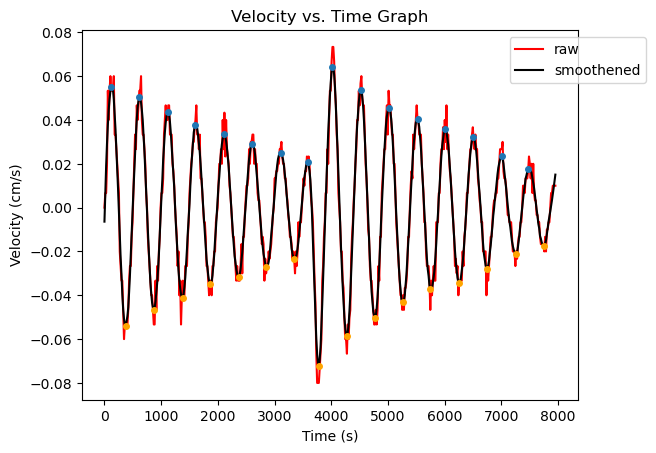

In [3]:
#Plot smooth veloctiy vs. time graph over raw velocity vs. time graph
velocity_smooth = signal.savgol_filter(velocity, 17, 2) 
plt.title("Velocity vs. Time Graph")
plt.ylabel("Velocity (cm/s)")
plt.xlabel("Time (s)")
plt.plot(time, velocity, color = "red", label = "raw")
plt.plot(time, velocity_smooth, color = "black", label = "smoothened")

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper center')

#Plot and get the velocity peaks
max_vpeak, _ = find_peaks(velocity_smooth, height = 0)
min_vpeak, _ = find_peaks(-velocity_smooth, height = 0)
plt.plot(time[max_vpeak], velocity_smooth[max_vpeak],'.', markersize = 8)
plt.plot(time[min_vpeak], velocity_smooth[min_vpeak], '.', color = "orange", markersize = 8)